In [1]:
import geopandas as gpd 
import pandas as pd
from shapely import ops
import os
import shapely
import numpy as np
import psycopg2
import pandana as pdna
import networkx as nx
import multiprocessing as mp
import matplotlib.pyplot as plt
from geoalchemy2 import Geometry, WKTElement
from sqlalchemy import *
from scipy import stats
import seaborn as sns; sns.set()
from shapely.geometry import *
shapely.speedups.enable()

%matplotlib inline 

In [ ]:
password = open('password.txt','r').readline()
username = 'postgres'
walkability_engine = create_engine('postgresql://%s:%s@172.19.118.205:5432/walkability' %(username,password))
#summary = gpd.read_postgis("select * from results.census_summary_walktimes_fin", walkability_engine, 'geom')
buildings = gpd.read_postgis("select * from staging.buildings327", walkability_engine, 'geom')

In [2]:
buildings = pd.read_csv('./buildings327.csv')

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (159,160,188,191,192,193,194,203,204,205,206,219,220,225,226,229,230,233,237,238,239,240) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(0, 30)

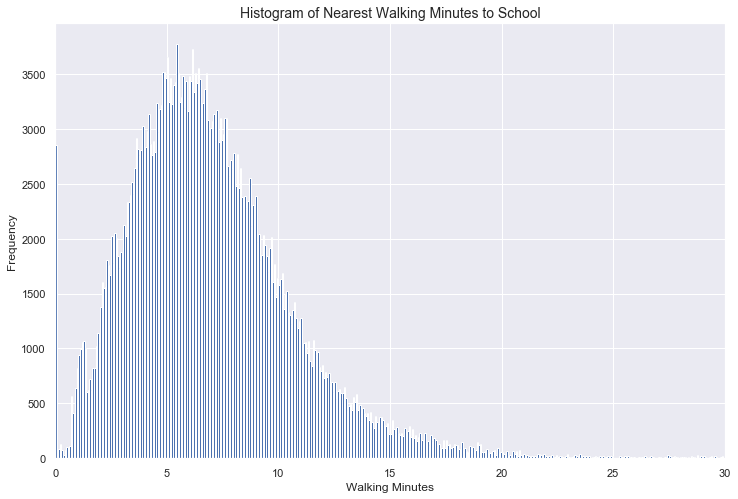

In [3]:
buildings['m_sc_0'].hist(bins=1000, figsize=(12,8))
plt.title('Histogram of Nearest Walking Minutes to School', fontsize=14)
plt.xlabel('Walking Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 30)


In [ ]:
print(buildings.columns.values)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns; sns.set()
columns = np.array(buildings["col"])
#print("Mean:       ", columns.mean())
#print("Standard deviation:", columns.std())
#print("Minimum:    ", columns.min())
#print("Maximum:    ", columns.max())
#print("25th percentile:   ", np.percentile(columns, 25))
#print("Median:            ", np.median(columns))
#print("75th percentile:   ", np.percentile(columns, 75))

mu= 100
sigma = 15
Mean=round(columns.mean(),4)
Min=round(columns.min(),4)
Max=round(columns.max(),4)
Std=round(columns.std(),4)
Median=round(np.median(columns),4)
t25h=np.percentile(columns, 25)
th25 = round(t25h, 4)
t75h=np.percentile(columns, 75)
th75=round(t75h, 4)
#textstr = '\n'.join((
##    r'Mean=%.2f' % (Mean, ),
#    r'Min=%.2f' % (Min, ),
#    r'Max=%.2f' % (Max, ),
 #   r'Std=%.2f' % (Std, ),
#    r'Median=%.2f' % (Median, ),
#    r't25h=%.2f' % (t25h, ),
#    r't75h=%.2f' % (t75h, )))
#print(Mean, Std, Min, Max, Median, t25h, t75h)
plt.hist(columns, bins=20, color='c', edgecolor='k', alpha=0.65, )
plt.axvline(columns.mean(), color='r', linestyle='dashed', linewidth=1, label="Mean:" + str(Mean))
plt.axvline(columns.min(), color='m', linestyle='dashed', linewidth=1, label="Min:" + str(Min))
plt.axvline(columns.max(), color='y', linestyle='dashed', linewidth=1, label="Max:" + str(Max))
plt.axvline(columns.std(), color='k', linestyle='dashed', linewidth=1, label="Std:" + str(Std))
plt.axvline(np.median(columns), color='g', linestyle='dashed', linewidth=1, label="Median:" + str(Median))
plt.axvline(np.percentile(columns, 25), color='b', linestyle='dashed', linewidth=1, label="25%:" + str(th25))
plt.axvline(np.percentile(columns, 75), color='k', linestyle='solid', linewidth=1, label="75%:" + str(th75))
#plt.text(55, 50.95, textstr )
#plt.title('Walking Minutes')
plt.title(col + " " +'Walking Minutes')
plt.xlabel('Minutes')
plt.ylabel('Count');
plt.legend(loc=0)
fig.savefig(i)
fig.clf()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns; sns.set()
for i, col in enumerate(buildings.columns):
    columns = np.array(buildings[col])
    #print("Mean:       ", columns.mean())
    #print("Standard deviation:", columns.std())
    #print("Minimum:    ", columns.min())
    #print("Maximum:    ", columns.max())
    #print("25th percentile:   ", np.percentile(columns, 25))
    #print("Median:            ", np.median(columns))
    #print("75th percentile:   ", np.percentile(columns, 75))
    fig = plt.figure()
    Mean=round(columns.mean(),4)
    Std=round(columns.std(),4)
    Min=round(columns.min(),4)
    Max=round(columns.max(),4)
    Median=round(np.median(columns),4)
    t25h=np.percentile(columns, 25)
    t75h=np.percentile(columns, 75)
    textstr = '\n'.join((
        r'Mean=%.2f' % (Mean, ),
        r'Min=%.2f' % (Min, ),
        r'Max=%.2f' % (Max, ),
        r'Std=%.2f' % (Std, ),
        r'Median=%.2f' % (Median, ),
        r't25h=%.2f' % (t25h, ),
        r't75h=%.2f' % (t75h, )))
    #print(Mean, Std, Min, Max, Median, t25h, t75h)
    plt.hist(columns, bins=20, color='c', edgecolor='k', alpha=0.65, )
    plt.axvline(columns.mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(columns.min(), color='m', linestyle='dashed', linewidth=1, label='Min')
    plt.axvline(columns.max(), color='y', linestyle='dashed', linewidth=1, label='Max')
    plt.axvline(columns.std(), color='k', linestyle='dashed', linewidth=1, label='Std')
    plt.axvline(np.median(columns), color='g', linestyle='dashed', linewidth=1, label='Median')
    plt.axvline(np.percentile(columns, 25), color='b', linestyle='dashed', linewidth=1, label='25th percentile')
    plt.axvline(np.percentile(columns, 75), color='k', linestyle='solid', linewidth=1, label='75th percentile')
    plt.text(60, 50.95, textstr )
    #plt.title('Walking Minutes')
    plt.title(col + " " +'Walking Minutes')
    plt.xlabel('Minutes')
    plt.ylabel('Count');
    plt.legend(loc=0)
    plt.savefig('col{0}.jpg'.format(i))
    fig.clf()